<a href="https://colab.research.google.com/github/SeanDeluski/Data-Projects/blob/main/DSP_310_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/IndraniMandal/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
sys.path.append(home)

Already up to date.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from treeviz import tree_print
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from confint import classification_confint

In [ ]:
sharelink = "https://docs.google.com/spreadsheets/d/15I-o53xsSQOTrpNFKRw-tAwonzubAPJHp4TdsZvCNUw/edit?usp=sharing"

url = sharelink.replace('/edit?usp=sharing', '/gviz/tq?tqx=out:csv')

df = pd.read_csv(url)

print(df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
maternal_health_risk = fetch_ucirepo(id=863)

# data (as pandas dataframes)
X = maternal_health_risk.data.features
y = maternal_health_risk.data.targets

In [ ]:
print("---------------------------------------------------------------")
print("QUESTION 1")
print("---------------------------------------------------------------")
print("My data set is called Maternal Health Risk and was collected from a variety of sources including hospitals, and clinics from Bangladesh. This is a multivariate classification data set consisting of 6 columns. The target variable is RiskLevel and features HeartRate, BodyTemp, BS, DiastolicBP, SystolicBP, and Age.")
print("Age is an integer, SystolicBP is an integer measured in mmHg, DiastolicBP is an integer measured in mmHg, BS is an integer measured in mmol/L, BodyTemp is an integer measured in degrees Fahrenheit, and HeartRate is an integer measured in bpm.")
print("I will be using classification to analyze if the RiskLevel is High, Low, or Medium.")
print("---------------------------------------------------------------")

---------------------------------------------------------------
QUESTION 1
---------------------------------------------------------------
My data set is called Maternal Health Risk and was collected from a variety of sources including hospitals, and clinics from Bangladesh. This is a multivariate classification data set consisting of 6 columns. The target variable is RiskLevel and features HeartRate, BodyTemp, BS, DiastolicBP, SystolicBP, and Age.
Age is an integer, SystolicBP is an integer measured in mmHg, DiastolicBP is an integer measured in mmHg, BS is an integer measured in mmol/L, BodyTemp is an integer measured in degrees Fahrenheit, and HeartRate is an integer measured in bpm.
I will be using classification to analyze if the RiskLevel is High, Low, or Medium.
---------------------------------------------------------------


In [ ]:
print("---------------------------------------------------------------")
print("QUESTION 2")
print("---------------------------------------------------------------")
print(X.isnull())
X.dtypes

---------------------------------------------------------------
QUESTION 2
---------------------------------------------------------------
        Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate
0     False       False        False  False     False      False
1     False       False        False  False     False      False
2     False       False        False  False     False      False
3     False       False        False  False     False      False
4     False       False        False  False     False      False
...     ...         ...          ...    ...       ...        ...
1009  False       False        False  False     False      False
1010  False       False        False  False     False      False
1011  False       False        False  False     False      False
1012  False       False        False  False     False      False
1013  False       False        False  False     False      False

[1014 rows x 6 columns]


,0
Age,int64
SystolicBP,int64
DiastolicBP,int64
BS,float64
BodyTemp,float64
HeartRate,int64


In [ ]:
print("---------------------------------------------------------------")
print("QUESTION 3")
print("---------------------------------------------------------------")
print(f"There are {X.shape[0]} rows and {X.shape[1]} columns in the data set.")
print(X.describe())
print("----------------------------------------------------------------")
print("The minimum Age reported is 10 years old, and the maximum Age is 70 years old. While the mean Age is 29.87 years old with a standard deviation of 13.47 years. 25% of the data is below 19 years and 75% below 39 years.")
print("The mean Systolic Blood Pressure is 113.20 mmHg with a standard deviation 18.40.")
print("The mean Diastolic Blood Pressure is 76.46 mmHg with a standard deviation of 13.89")
print("The mean Blood Sugar Level is 8.73 mmol/L with a standard deviation of 3.29.")
print("The mean Body Temperature is 98.67F with a standard deviation of 1.37.")
print("The mean Heart Rate is 74.30 bpm with a standard deviation of 8.09.")
print("The heart rate of 7bpm may be a potiental outlier.")
print("---------------------------------------------------------------")

---------------------------------------------------------------
QUESTION 3
---------------------------------------------------------------
There are 1014 rows and 6 columns in the data set.
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.00000

In [ ]:
print("---------------------------------------------------------------")
print("QUESTION 4")
print("---------------------------------------------------------------")

print("My data seems to be re")

---------------------------------------------------------------
QUESTION 4
---------------------------------------------------------------
My data seems to be re


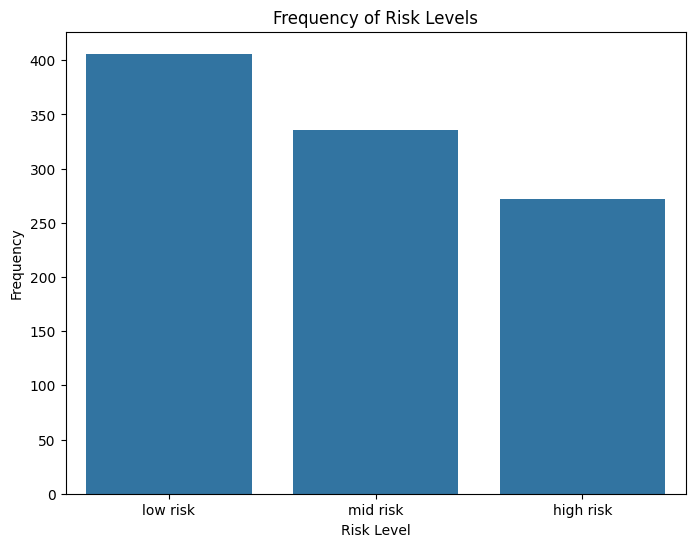

-------------------------------------------------------------
My data is not well balanced since majority of the data set is classified as 'low risk' which may skew the results of model.


In [ ]:
risklevel_counts = df['RiskLevel'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=risklevel_counts.index, y=risklevel_counts.values)

# Set titles and labels
plt.title('Frequency of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Frequency')

# Show the plot
plt.show()

print("-------------------------------------------------------------")
print("My data is not well balanced since majority of the data set is classified as 'low risk' which may skew the results of model.")

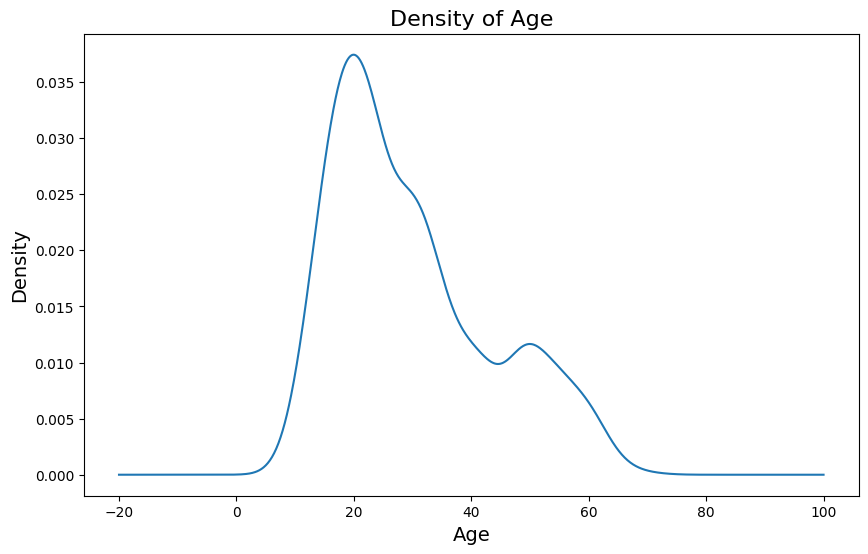

In [ ]:
plt.figure(figsize=(10, 6))

#plots for Age
X.loc[:, 'Age'].plot.kde()

#axis titles
plt.title('Density of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

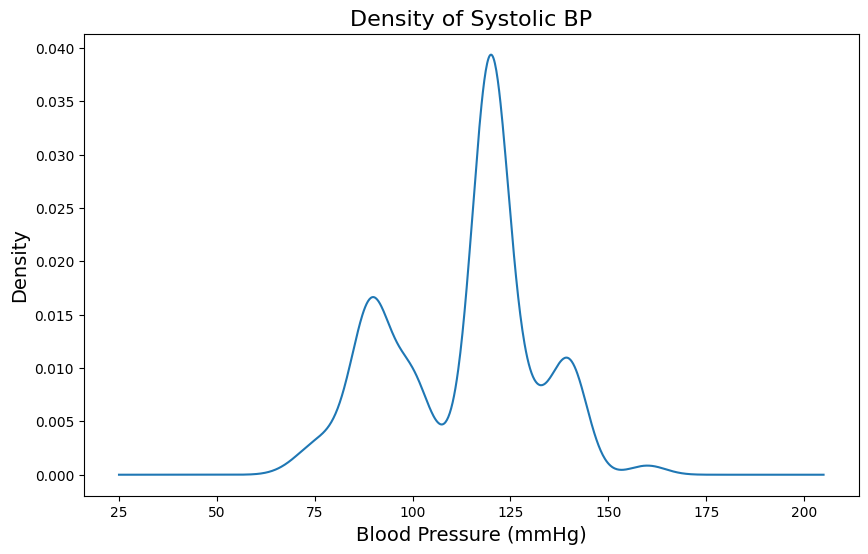

In [ ]:
plt.figure(figsize=(10, 6))

#plots for SBP
X.loc[:, 'SystolicBP'].plot.kde()

#axis titles
plt.title('Density of Systolic BP', fontsize=16)
plt.xlabel('Blood Pressure (mmHg)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

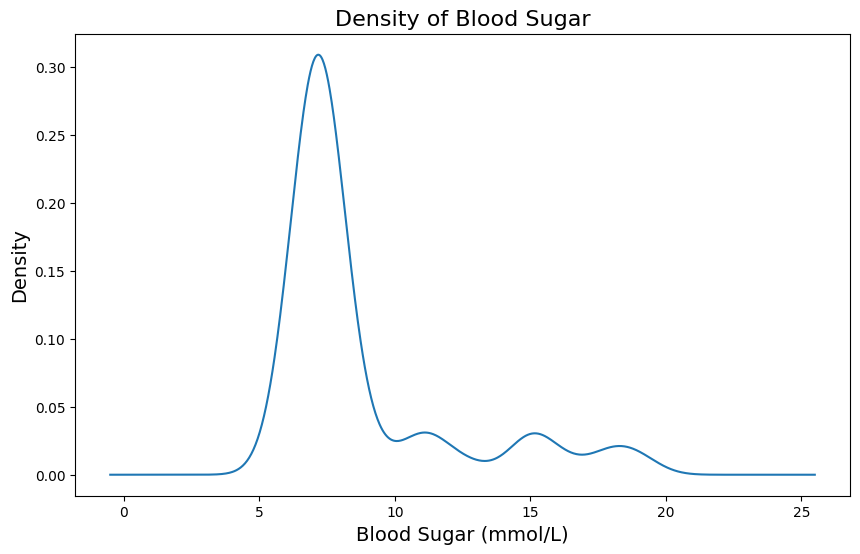

In [ ]:
plt.figure(figsize=(10, 6))

#plots for BS
X.loc[:, 'BS'].plot.kde()

#axis titles
plt.title('Density of Blood Sugar', fontsize=16)
plt.xlabel('Blood Sugar (mmol/L)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

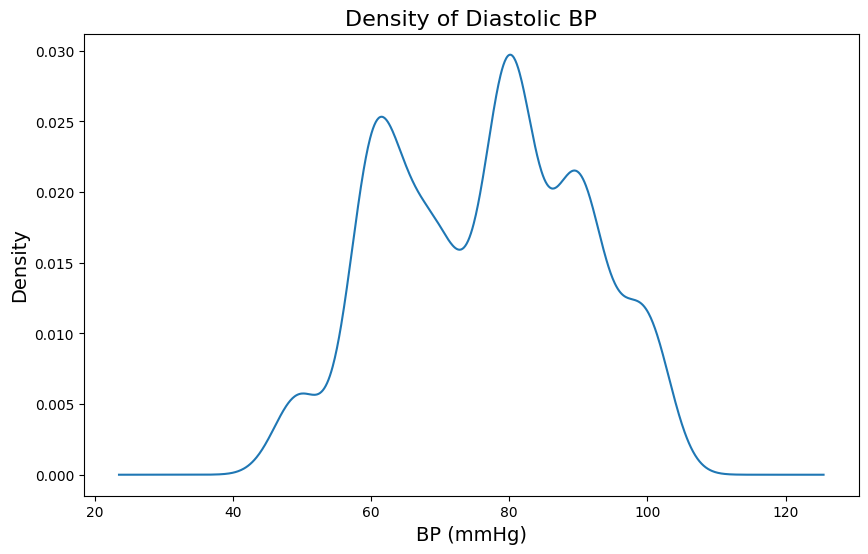

In [ ]:
plt.figure(figsize=(10, 6))

#plots for DBP
X.loc[:, 'DiastolicBP'].plot.kde()

#axis titles
plt.title('Density of Diastolic BP', fontsize=16)
plt.xlabel('BP (mmHg)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

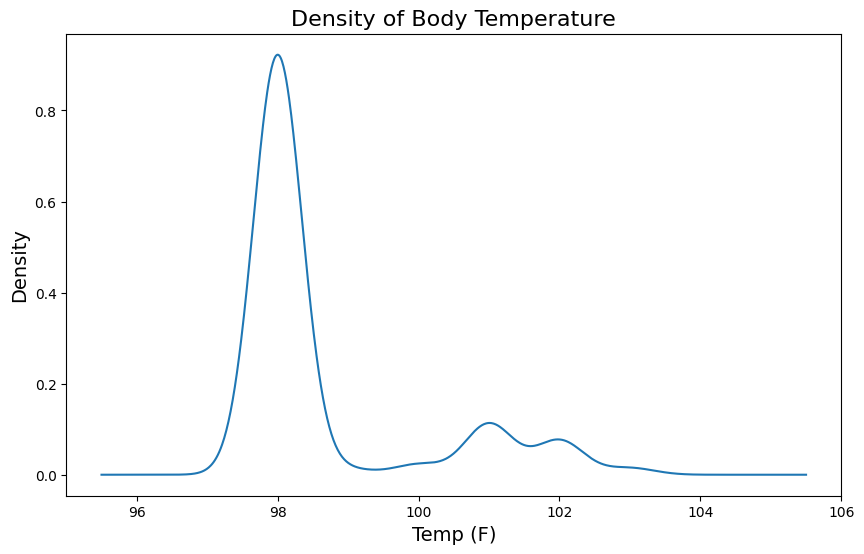

In [ ]:
plt.figure(figsize=(10, 6))

#plots for bodytemp
X.loc[:, 'BodyTemp'].plot.kde()

#axis titles
plt.title('Density of Body Temperature', fontsize=16)
plt.xlabel('Temp (F)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

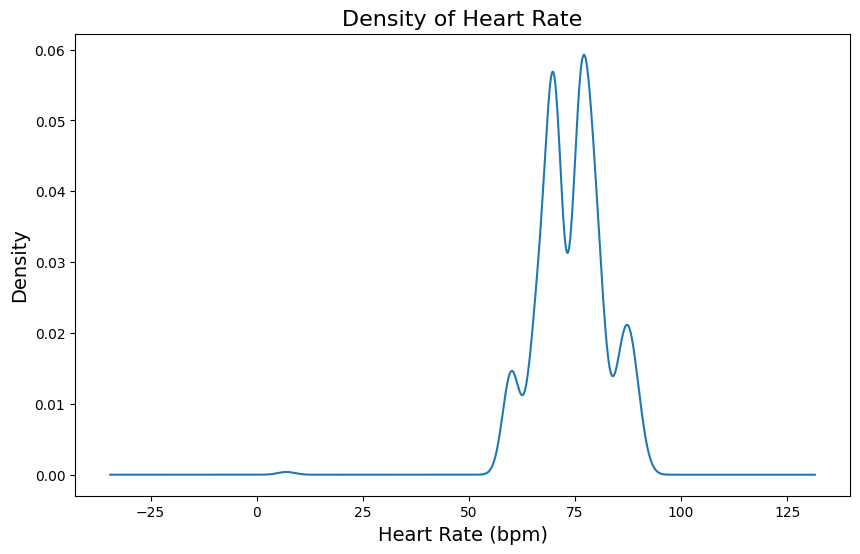

In [ ]:
plt.figure(figsize=(10, 6))

#plots for Age
X.loc[:, 'HeartRate'].plot.kde()

#axis titles
plt.title('Density of Heart Rate', fontsize=16)
plt.xlabel('Heart Rate (bpm)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SystolicBP'}>],
       [<Axes: title={'center': 'DiastolicBP'}>,
        <Axes: title={'center': 'BS'}>],
       [<Axes: title={'center': 'BodyTemp'}>,
        <Axes: title={'center': 'HeartRate'}>]], dtype=object)

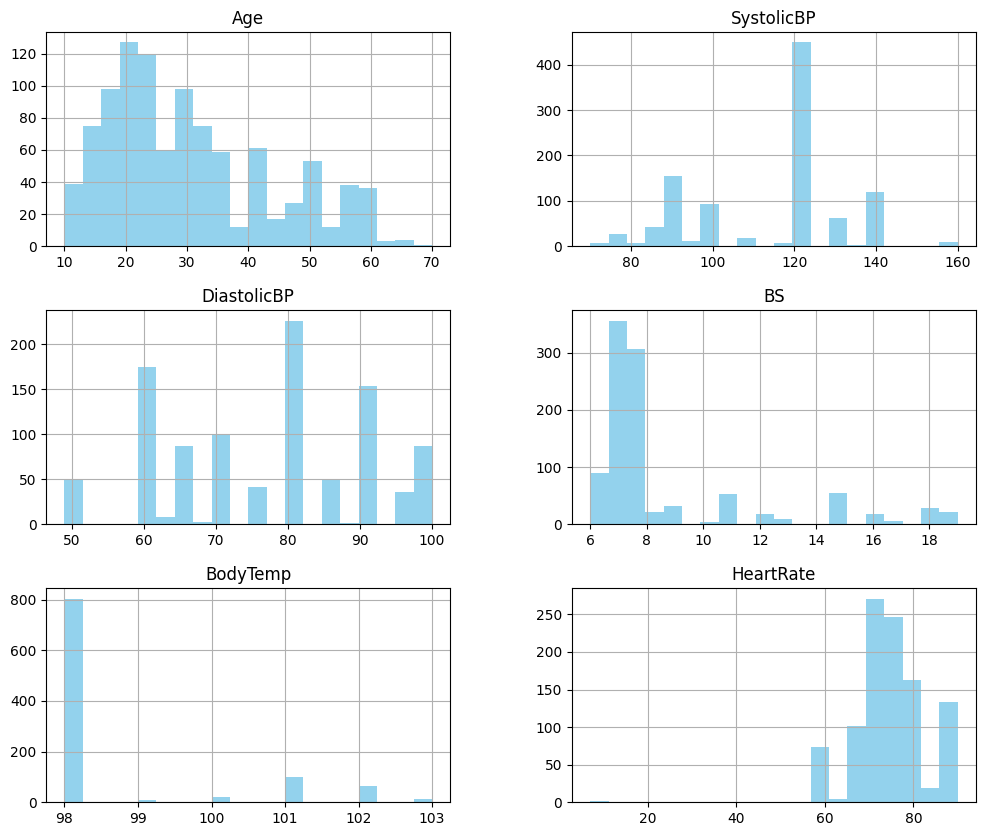

In [ ]:
X.hist(bins=20, figsize=(12, 10), color='skyblue', alpha=0.9, grid=True)

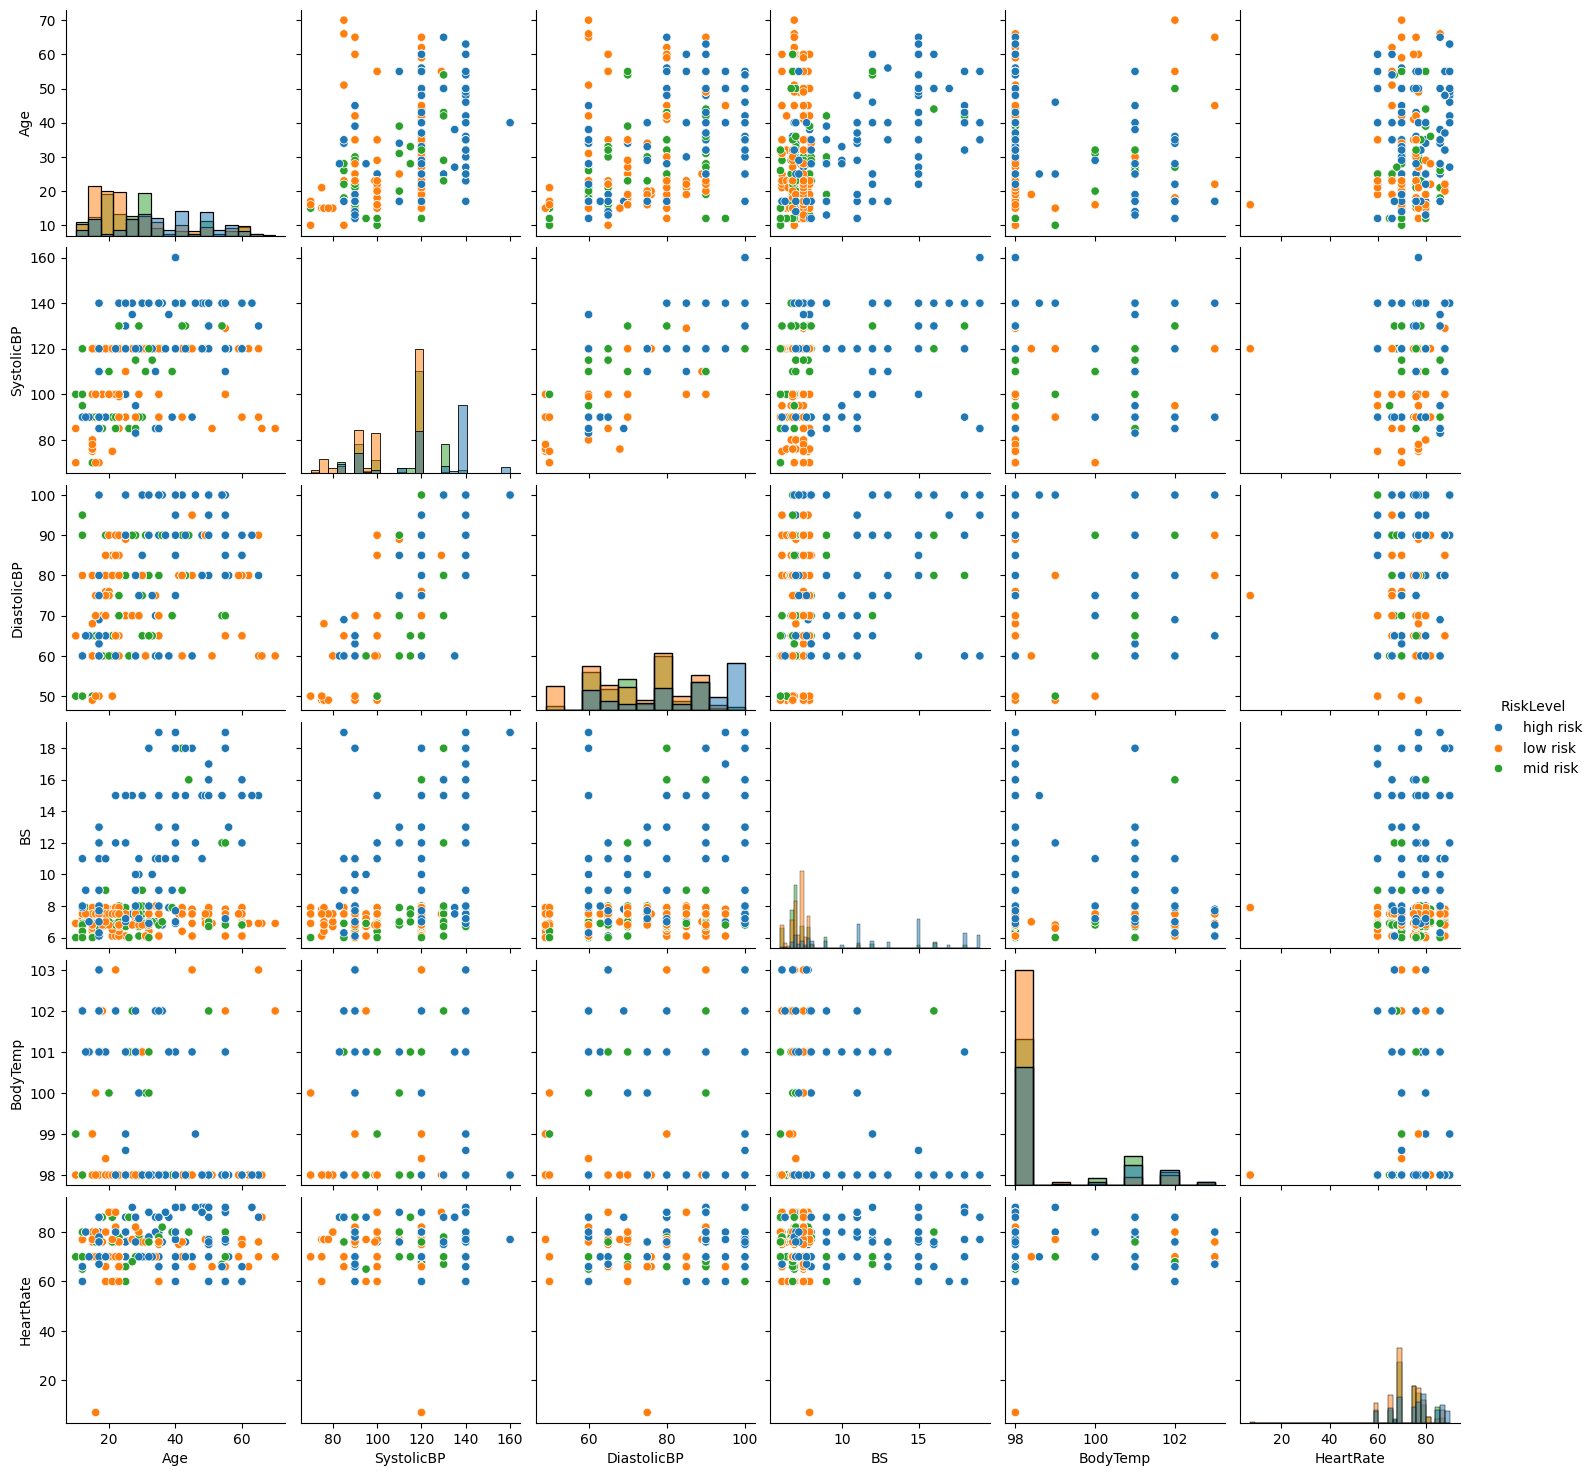

In [ ]:
sns.pairplot(df, hue='RiskLevel', diag_kind='hist')
plt.show()

<ipython-input-22-f94a477a03b1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RiskLevel', y=variable, data=data, palette='Set1')
<ipython-input-22-f94a477a03b1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RiskLevel', y=variable, data=data, palette='Set1')
<ipython-input-22-f94a477a03b1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RiskLevel', y=variable, data=data, palette='Set1')
<ipython-input-22-f94a477a03b1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

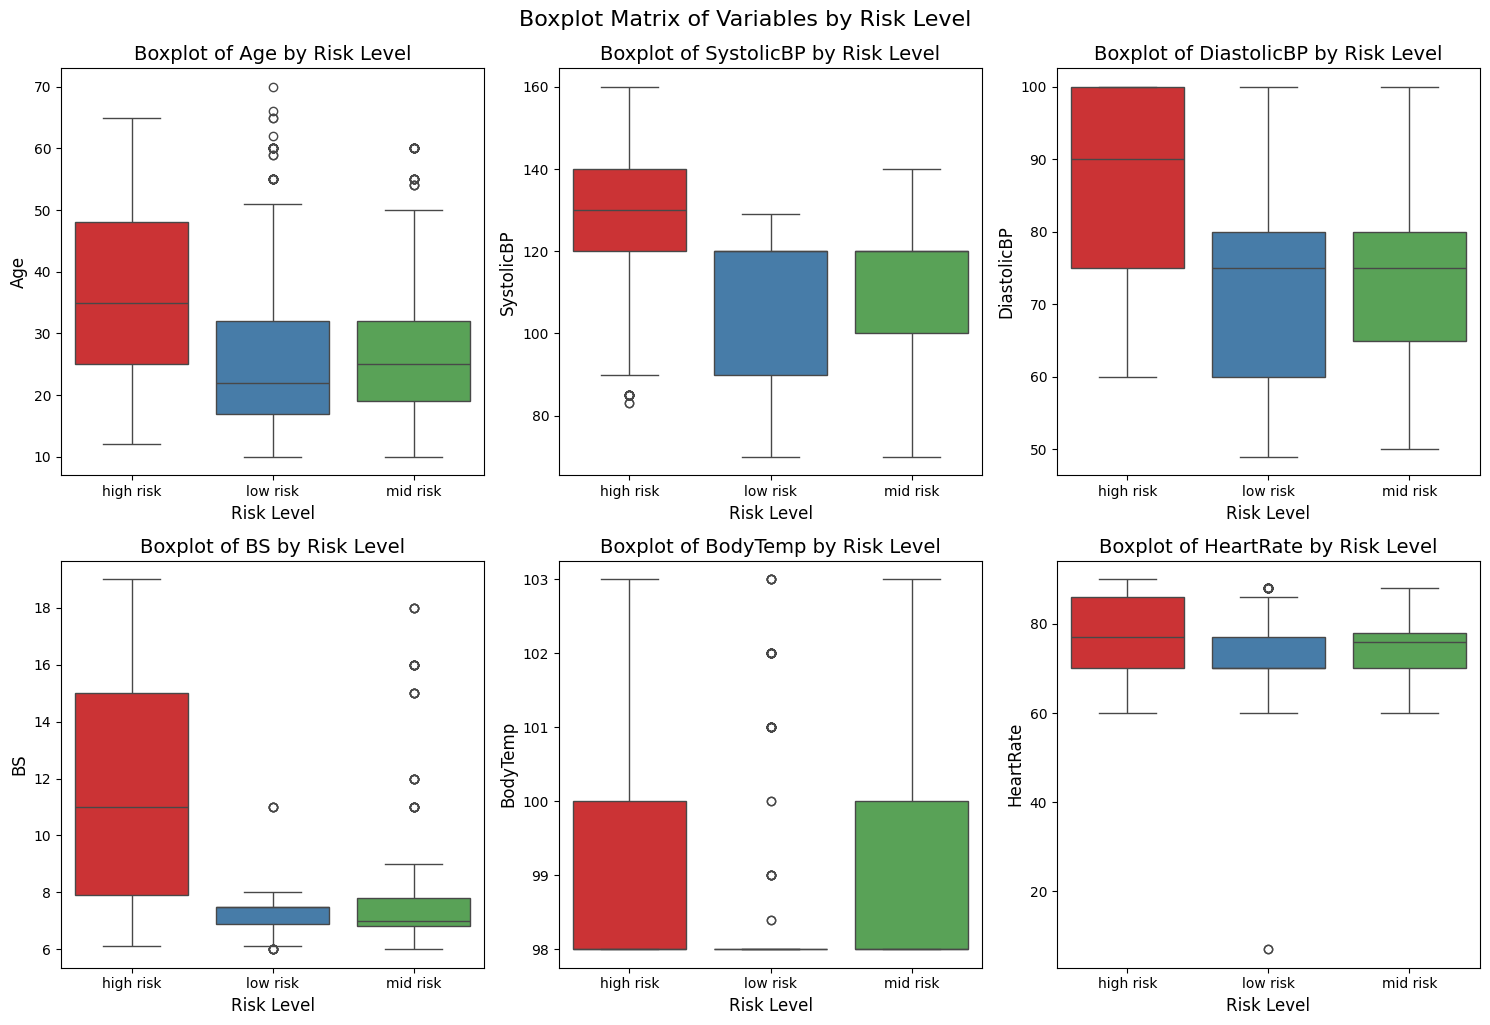

In [ ]:
data = X.copy()
data['RiskLevel'] = [y['RiskLevel'][i] for i in range(len(data))]

df = pd.DataFrame(data)

#sets figure size
plt.figure(figsize=(15, 10))

#key variables
key_variables = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

#creates plots for each variable
for i, variable in enumerate(key_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='RiskLevel', y=variable, data=data, palette='Set1')
    plt.title(f'Boxplot of {variable} by Risk Level', fontsize=14)
    plt.xlabel('Risk Level', fontsize=12)
    plt.ylabel(variable, fontsize=12)

plt.tight_layout()
plt.suptitle('Boxplot Matrix of Variables by Risk Level', fontsize=16, y=1.02)
plt.show()

In [ ]:
print("---------------------------------------------------------------")
print("QUESTION 4 Findings")
print("---------------------------------------------------------------")

print("Overall, it seems the younger the age, the less likely you are to be considered 'high risk'.")
print("Many of the key variables are multimodal. According to the boxplot matrix, with the exception of outliers, SystolicBP and Blood Sugar levels have a strict identifying value when determining if someone is high risk. Anyone with a systolic blood pressure of 120 mmHg or above are classified as high risk as well anyone with a blood sugar level of ~8 mmol/L is classified as high risk.")

---------------------------------------------------------------
QUESTION 4 Findings
---------------------------------------------------------------
Overall, it seems the younger the age, the less likely you are to be considered 'high risk'.
Many of the key variables are multimodal. According to the boxplot matrix, with the exception of outliers, SystolicBP and Blood Sugar levels have a strict identifying value when determining if someone is high risk. Anyone with a systolic blood pressure of 120 mmHg or above are classified as high risk as well anyone with a blood sugar level of ~8 mmol/L is classified as high risk.


In [ ]:
print("---------------------------------------------------------------")
print("QUESTION 5")
print("---------------------------------------------------------------")

---------------------------------------------------------------
QUESTION 5
---------------------------------------------------------------


In [ ]:
#splits data - 70% training 30% testing
datasets = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=2)
(X_train, X_test, y_train, y_test) = datasets

In [ ]:
print("---------------------------------------------------------------")
print("QUESTION 5: PART 1")
print("---------------------------------------------------------------")

---------------------------------------------------------------
QUESTION 5: PART 1
---------------------------------------------------------------


In [ ]:
print("--------------------------------------------------------------")
print("LOW COMPLEXITIY MODEL")
print("--------------------------------------------------------------")
#sets up model
low_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)

#fits model
low_model.fit(X_train, y_train)
tree_print(low_model,X)

#train results
y_train_low_model = low_model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

#test results
y_test_low_model = low_model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

print("--------------------------------------------------------------")
print("The low compelxity model is underfitting because the tree depth is only set to one and is only using blood sugar level to train the model leading to inaccurate results. Some of the patients within the data may be predisposed to conditions effecting their blood sugar levels which may skew the models results.")
print("The only comparison being made by the model is with blood sugar levels.")
print("The model can only make the decision regarding a blood sugar level and its relationship with the Risk Level.")
print("--------------------------------------------------------------")

--------------------------------------------------------------
LOW COMPLEXITIY MODEL
--------------------------------------------------------------
if BS =< 7.950000047683716: 
  |then low risk
  |else high risk
<->
Tree Depth:  1


NameError: name 'y_train_model' is not defined

In [ ]:
print("--------------------------------------------------------------")
print("HIGH COMPLEXITY MODEL")
print("--------------------------------------------------------------")
#sets up model
high_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None)

#fits the model
high_model.fit(X_train, y_train)
tree_print(high_model,X)

#train results
y_train_high_model = high_model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_high_model)))

#test results
y_test_high_model = high_model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_high_model)))

--------------------------------------------------------------
HIGH COMPLEXITY MODEL
--------------------------------------------------------------
if BS =< 7.950000047683716: 
  |then if SystolicBP =< 132.5: 
  |  |then if BodyTemp =< 99.5: 
  |  |  |then if SystolicBP =< 125.0: 
  |  |  |  |then if BS =< 7.005000114440918: 
  |  |  |  |  |then if HeartRate =< 79.0: 
  |  |  |  |  |  |then if DiastolicBP =< 49.5: 
  |  |  |  |  |  |  |then low risk
  |  |  |  |  |  |  |else if BS =< 6.75: 
  |  |  |  |  |  |  |  |then if DiastolicBP =< 62.5: 
  |  |  |  |  |  |  |  |  |then if BS =< 6.450000047683716: 
  |  |  |  |  |  |  |  |  |  |then if Age =< 18.0: 
  |  |  |  |  |  |  |  |  |  |  |then mid risk
  |  |  |  |  |  |  |  |  |  |  |else if Age =< 27.0: 
  |  |  |  |  |  |  |  |  |  |  |  |then low risk
  |  |  |  |  |  |  |  |  |  |  |  |else if Age =< 33.0: 
  |  |  |  |  |  |  |  |  |  |  |  |  |then mid risk
  |  |  |  |  |  |  |  |  |  |  |  |  |else mid risk
  |  |  |  |  |  |  |

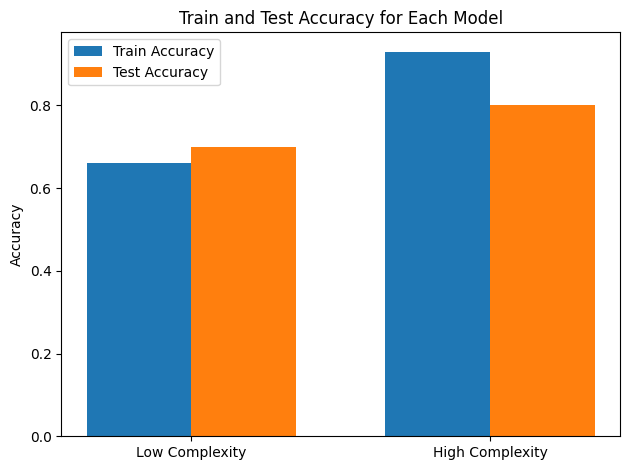

--------------------------------------------------------------
The high complexity model is overfitting since the model can only be applied to this dataset.
The model can't be generalized since people in and out of the study can have pre-existing conditions making them predisposed to high or low levels of each variable.
Two things that we are already doing to prevent overfitting is splitting the data set 70/30 and using cross-validation to see how the model performs across different subsets of data.


In [ ]:
#scores
train_acc = [0.66, 0.93]
test_acc = [0.70, 0.80]

#x-labels
model_names = ["Low Complexity", "High Complexity"]

#creates plot
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_acc, width, label="Train Accuracy")
rects2 = ax.bar(x + width/2, test_acc, width, label="Test Accuracy")

#labels
ax.set_ylabel("Accuracy")
ax.set_title("Train and Test Accuracy for Each Model")
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

fig.tight_layout()
plt.show()

print("--------------------------------------------------------------")
print("The high complexity model is overfitting since the model can only be applied to this dataset.")
print("The model can't be generalized since people in and out of the study can have pre-existing conditions making them predisposed to high or low levels of each variable.")
print("Two things that we are already doing to prevent overfitting is splitting the data set 70/30 and using cross-validation to see how the model performs across different subsets of data.")

In [ ]:
print("---------------------------------------------------------------")
print("QUESTION 5: PART 2")
print("---------------------------------------------------------------")

---------------------------------------------------------------
QUESTION 5: PART 2
---------------------------------------------------------------


In [ ]:
#only selects the numerical columns
X_numerical = X.select_dtypes(include=['number'])

#sets up grid search using cv
best_medium_model = DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': list(range(1, 11)),
    'criterion': ['entropy', 'gini']
}
grid = GridSearchCV(best_medium_model, param_grid, cv=5)

#performs grid search
grid.fit(X_numerical, y)

#prints best parameters
print("Best parameters: {}".format(grid.best_params_))

#prints best model
tree_print(grid.best_estimator_, X_numerical)

#computes the accuracy
predict_y = grid.best_estimator_.predict(X_numerical)
acc = accuracy_score(y, predict_y)

#prints accuracy
print("Accuracy of optimal classifier: {:3.2f}".format(acc))

#5-fold cross validation
scores = cross_val_score(best_medium_model, X_numerical, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

print("-------------------------------------------------------------")
print("The optimal classifier is 0.85 and the best parameters are 'criterion': 'gini', and 'max_depth: 10'")
print("We perform cross-validation inorder to reduce overfitting, assess the models performance, and decide which model performed the best.")
print("The best model is the medium complexity model. the low complexity model underfits and the high compelxity model overfits while the mid compelxity model has a good accuracy of 0.85.")
print("-------------------------------------------------------------")

Best parameters: {'criterion': 'gini', 'max_depth': 10}
if BS =< 7.950000047683716: 
  |then if SystolicBP =< 132.5: 
  |  |then if BS =< 7.055000066757202: 
  |  |  |then if BodyTemp =< 99.5: 
  |  |  |  |then if SystolicBP =< 125.0: 
  |  |  |  |  |then if DiastolicBP =< 49.5: 
  |  |  |  |  |  |then low risk
  |  |  |  |  |  |else if Age =< 19.5: 
  |  |  |  |  |  |  |then if Age =< 15.5: 
  |  |  |  |  |  |  |  |then if DiastolicBP =< 55.0: 
  |  |  |  |  |  |  |  |  |then if BS =< 6.650000095367432: 
  |  |  |  |  |  |  |  |  |  |then mid risk
  |  |  |  |  |  |  |  |  |  |else low risk
  |  |  |  |  |  |  |  |  |else if Age =< 13.5: 
  |  |  |  |  |  |  |  |  |  |then mid risk
  |  |  |  |  |  |  |  |  |  |else low risk
  |  |  |  |  |  |  |  |else if BodyTemp =< 98.20000076293945: 
  |  |  |  |  |  |  |  |  |then if HeartRate =< 63.0: 
  |  |  |  |  |  |  |  |  |  |then low risk
  |  |  |  |  |  |  |  |  |  |else mid risk
  |  |  |  |  |  |  |  |  |else low risk
  |  |  |  |  | 

In [ ]:
print("---------------------------------------------------------------")
print("QUESTION 5: PART 3")
print("---------------------------------------------------------------")

print("--------------------------------------------------------------")
print("TEN PERCENT WORSE MODEL")
print("--------------------------------------------------------------")
#sets up model
ten_percent_worse_model = tree.DecisionTreeClassifier(criterion='gini', max_depth=8)

#fits the model
ten_percent_worse_model.fit(X_train, y_train)
tree_print(ten_percent_worse_model,X)

#train results
y_train_ten_percent_worse_model = ten_percent_worse_model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_ten_percent_worse_model)))

#test results
y_test_ten_percent_worse_model = ten_percent_worse_model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_ten_percent_worse_model)))

print("----------------------------------------------------------------")
print("This model has a tree depth of 8 which gives it a roughly 10% decrease in accuracy score than the unrestricted model. It's accuracy score is a little below the accuracy score of the best model being 0.85.")
print("I don't believe this model gives any further insights except it does show that even a tree depth of 8 can still produce accurate results.")

---------------------------------------------------------------
QUESTION 5: PART 3
---------------------------------------------------------------
--------------------------------------------------------------
TEN PERCENT WORSE MODEL
--------------------------------------------------------------
if BS =< 7.950000047683716: 
  |then if SystolicBP =< 132.5: 
  |  |then if BS =< 7.055000066757202: 
  |  |  |then if Age =< 15.5: 
  |  |  |  |then if HeartRate =< 73.0: 
  |  |  |  |  |then if DiastolicBP =< 72.5: 
  |  |  |  |  |  |then if BodyTemp =< 100.0: 
  |  |  |  |  |  |  |then if BS =< 6.650000095367432: 
  |  |  |  |  |  |  |  |then mid risk
  |  |  |  |  |  |  |  |else mid risk
  |  |  |  |  |  |  |else if BS =< 6.549999952316284: 
  |  |  |  |  |  |  |  |then low risk
  |  |  |  |  |  |  |  |else high risk
  |  |  |  |  |  |else if DiastolicBP =< 87.5: 
  |  |  |  |  |  |  |then low risk
  |  |  |  |  |  |  |else if BS =< 6.8500001430511475: 
  |  |  |  |  |  |  |  |then mid risk

In [ ]:
# @title
print("---------------------------------------------------------------")
print("QUESTION 6")
print("---------------------------------------------------------------")

#ten percent worse confidence interval
y_ten_test_model = ten_percent_worse_model.predict(X_test)
worse_acc = accuracy_score(y_test, y_ten_test_model)
observations = X_test.shape[0]
lb,ub = classification_confint(worse_acc, observations)
print("Ten Percent Worse Model Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(worse_acc,lb,ub))

#medium confidence interval
y_test_medium = medium_complexity_model.predict(X_test)
acc = accuracy_score(y_test, y_test_medium)
observations = X_test.shape[0]
lb,ub = classification_confint(acc, observations)
print("Medium Model Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

print("----------------------------------------------------------------")
print("The medium model is more complex than the ten percent worse model since the medium model has a tree depth of 10. The ten percent worse model has a tree depth of 8 meaning it uses less information to make a decision than the medium model.")
print("")
print("The raw score of the medium complexity model is higher than the ten percent worse model. However, since the confidence intervals overlap the differnece is not statistically significant.")
print("The confidence intervals also tell us that the ten percent model accuracy score could be 0.81 which is better than the raw score of the medium confidence interval of 0.79.")

---------------------------------------------------------------
QUESTION 7
---------------------------------------------------------------
Ten Percent Worse Model Accuracy: 0.77 (0.72,0.81)
Medium Model Accuracy: 0.80 (0.75,0.84)
----------------------------------------------------------------
The medium model is more complex than the ten percent worse model since the medium model has a tree depth of 10. The ten percent worse model has a tree depth of 8 meaning it uses less information to make a decision than the medium model.

The raw score of the medium complexity model is higher than the ten percent worse model. However, since the confidence intervals overlap the differnece is not statistically significant.
The confidence intervals also tell us that the ten percent model accuracy score could be 0.81 which is better than the raw score of the medium confidence interval of 0.79.
